# 13장 모델의 성능 검증하기

##  데이터의 확인과 예측 실행

광물 데이터 셋을 이용해서 보겠다.  <br />
광물에 음파를 쐈을 때 이것이 암석인지 광석인지를 알아보는 것이다.<br />
60개의 속성으로 되어 있고 마지막 항목에 광물인지 아닌지가 0과 1로 되어 있다.<br />
sonar3.csv파일에 있는 내용을 확인해 보자<br />
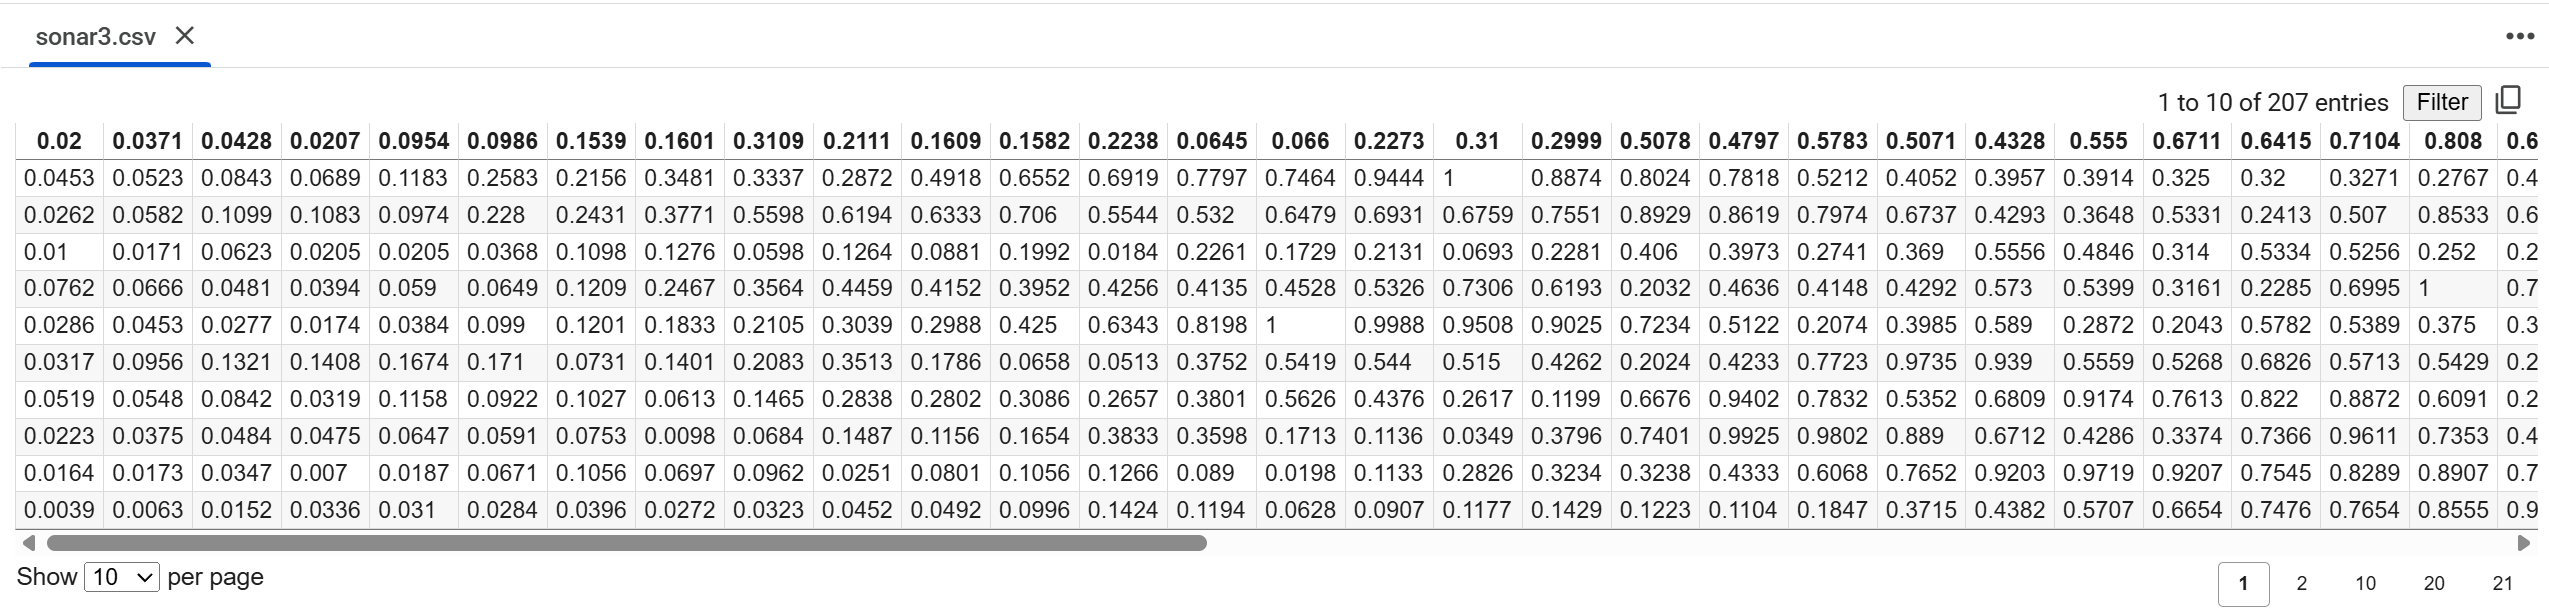

In [40]:
import pandas as pd

# 데이터 입력
df = pd.read_csv('./data/sonar3.csv', header=None)

# 첫 5줄을 봅니다. 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [41]:
# 일반 암석(0)과 광석(1)이 몇 개 있는지 확인합니다.
df[60].value_counts()
# 광석이 111개 암석이 97개 임을 알 수 있다.

60
1    111
0     97
Name: count, dtype: int64

In [42]:
import sys
print(sys.executable)

C:\Users\taehj\anaconda3\envs\deep_learning\python.exe


In [43]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60] # 60번째 컬럼을 X로
y = df.iloc[:,60] # 마지막 컬럼은  y로 두었다.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4618 - loss: 0.6971   
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6545 - loss: 0.6808 
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 0.6751 
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.6763 
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 0.6508 
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.6456 
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6357 - loss: 0.6478 
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.6179 
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7442 - loss: 0.6137 
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 0.5935 
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.5673 
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

21/21 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9712
Epoch 84/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9712
Epoch 85/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9760
Epoch 86/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1244 - accuracy: 0.9615
Epoch 87/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9760
Epoch 88/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9760
Epoch 89/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9663
Epoch 90/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9712
Epoch 91/200
21/21 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9808
Epoch 92/200
21/21 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9760
Epoch 93/200


21/21 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 165/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 166/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 167/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 168/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 169/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 170/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 171/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 172/200
21/21 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 173/200
21/21 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 1.0000
Epoc

마지막 결과가 21/21 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000<br />
accuracy가 1.0라는 것은 예측이 100%라는 것인데 정말 100% 가 나올 수 있을까? 혹시 과접합 오류가 발생한 것이 아닌가? 라는 문제가 있을 수 있다.<br />
내가 만든 모델에서는 잘 작동하겠지만 정말 잘 작동하는지를 확인할 필요가 있는데 그것이 테스트 셋을 이용해서 결과를 확인해 봐야 한다.

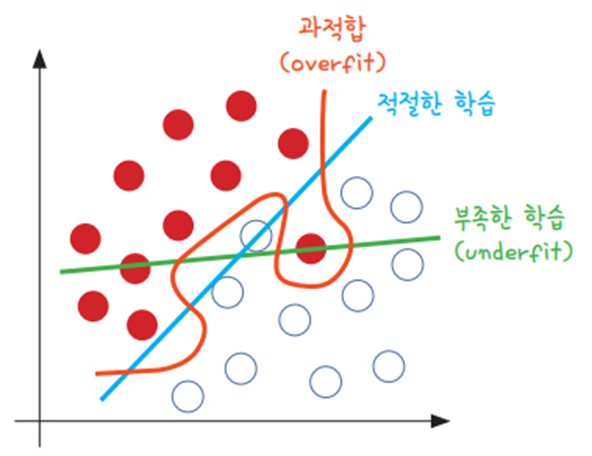<br />
파란 색 실선 처럼 적절하게 선을 그어 주어야 하는데 너무 학습을 하게 되면 빨간색과 하얀색을 완벽하게 구분하는 선이 그어질 수 있게 된다.<br />
그런데 빨간선이 그어져 있는 상태에서 파란색위족 빨간색 안쪽에 데이터가 위치되어 있다면 적합하다라고 해야 함에도 적절하지 않다고 할 수 있다는 문재가 생긴다.<br />
제대로 분류하지 못하는 것을 과적합이라고 한다.<br />
학습을 할 때 사용한 데이터에만 적용이 되게 만들어지는 것을 막아주기 위해서 데이트 셋을 이용해서 어디까지만 학습이 되어야 하는 정해줘야 한다.

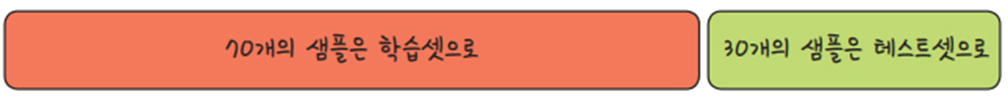<br />
그래서 그림에서 나타낸 것 처럼 학습은 70%(80%)만 가지고 30%(20%)는 테스트 셋으로 정해서 사용한다.<br />
학습 셋은 학습만하고 테스트 셋은 테스트만 할 수 있게 따로 두어 작 학습을 했는지 확인 해야 한다.

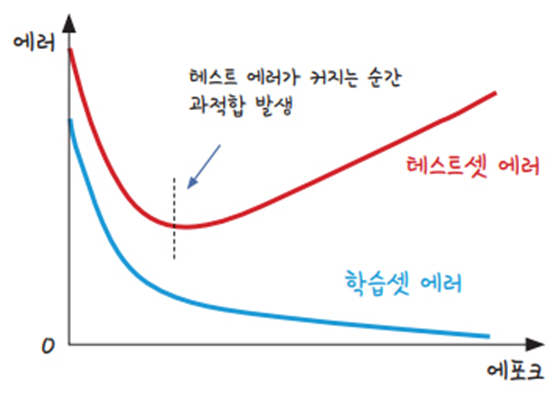<br />
주어진 데이터로만 학습을 하게 되면 반복할 수록 에러가 줄어드는 것을 볼 수 있는데 <br />
하지만 데스트 셋을 이용하면서 어느 순간 부터는 에러가 발생하는 것을 알 수 있다. 이것이 과적합 발생이된다.<br />
이렇게 과적합이 발생이 되면 학습을 중단해야하는데 그것을 해주는 것이 테스트 셋이다. 

## 3. 학습셋과 테스트셋

In [45]:
# 사이킷런 라이브러리를 설치하는 부분입니다. 처음 설치한다면 아래 #를 삭제하고 실행하세요.
#!pip install scikit-learn
# 사이킷런 라이브러리가 학습 셋과 테스트 셋을 나눠주는 역할 을 한다.

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [47]:
# 데이터를 입력합니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

In [48]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [49]:
# 학습 셋과 테스트 셋을 구분합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# test_size=0.3는 테스트 셋을 30%로 하라는 것이고 shuffle=True는 나누기 전에 썩어주라는 것이다.

In [50]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
# X_train, y_train을 이용해서 학습을 한다.
history=model.fit(X_train, y_train, epochs=200, batch_size=10) 

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4420 - loss: 0.6952  
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5456 - loss: 0.6846 
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 0.6631 
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7484 - loss: 0.6504 
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7083 - loss: 0.6461 
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.6317 
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.6221 
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 0.6049 
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.5822 
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.6032 
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.5712 
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [51]:
# 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test) # evaluate는 테스트 셋을 이용해서 정확도를 확인한다. 
print('Test accuracy:', score[1])    

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7789 - loss: 0.5012
Test accuracy: 0.7777777910232544


In [ ]:
Test accuracy: 0.7777777910232544 가 나왔다는 것은 먼저 학습은 과접합오류가 있었다는 것을 알 수 있다.

## 4. 모델 저장과 재사용

In [52]:
# 모델을 저장합니다. 
model.save('./data/model/my_model.hd5', save_format='tf')

In [53]:
from tensorflow.keras.models import Sequential, load_model

In [54]:
# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제합니다.
del model 

In [55]:
# 모델을 새로 불러옵니다.
model = load_model('./data/model/my_model.hd5') 

# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다. 
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7789 - loss: 0.5012 
Test accuracy: 0.7777777910232544


## 5. k겹 교차 검증

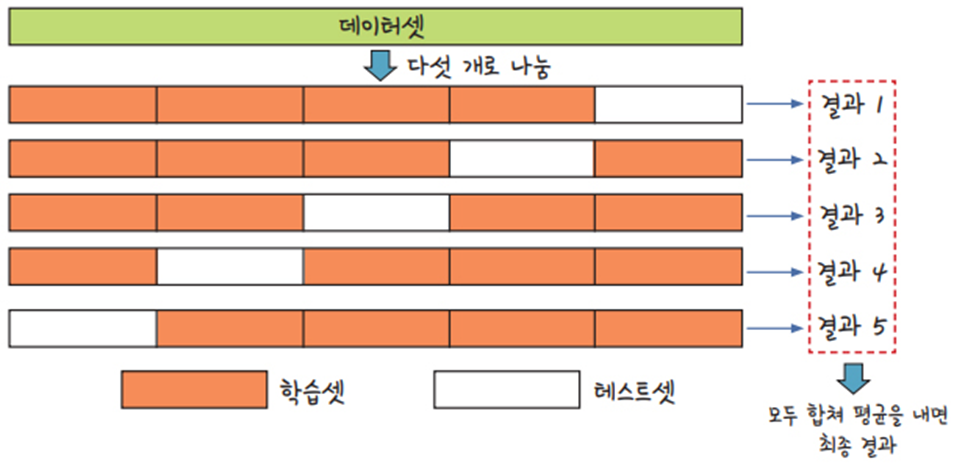<br />
학습셋과 테스트 셋만으로도 데이터가 부족할 때 모든 데이터를 활용해서 학습과 테스트셋을 사용할 수 없을까 라고 해서 나온 방법<br />
일부를 학습셋으로 일부를 테스트 셋으로 사용하는것을 번갈아 가면서 사용<br />
k데이터셋을 다섯 개로 나눈 후 그중 네 개를 학습셋으로, 나머지 하나를 테스트셋으로 만들어 다섯 번의 학습을 순차적으로 실시하는 것이 5겹 교차 검증<br />
이렇게 나온 값에 평균을 내서 확인 하는 방법

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [57]:
#몇 겹으로 나눌 것인지를 정합니다. 
k=5 

#KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)  # KFold: close_validation(교차검증)이라고 해서 5로 하면 5개로 나누라는 것이고 10으로 하면 10개로 나누라는 것이다.

#정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn(): # 교차검증이기 때문에 교차하는 만큼 모델을 만들어야 하는데 대신 함수를 만들어서 사용하자.
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.

#k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

#결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7897 - loss: 0.6872
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9315 - loss: 0.1919
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8423 - loss: 0.6285 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7703 - loss: 0.5063
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7599 - loss: 0.6241 
정확도: [0.8095238208770752, 0.9285714030265808, 0.8571428656578064, 0.7804877758026123, 0.7804877758026123]
정확도 평균: 0.8312427282333374


# 재 학습 하기

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/data/refs/heads/main/sonar3.csv', header=None)

X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# 기존 학습된 모델 불러오기
model = load_model('./data/model/my_model.hd5')

# 모델 구조 확인
model.summary()

#  추가 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

#  평가
loss, acc = model.evaluate(X_test, y_test)
print(f"재학습 후 정확도: {acc:.4f}")

#  다시 저장
model.save('./data/model/my_model_retrained.h5')


# 예측 하기

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# 1. 저장된 모델 불러오기
model = load_model('./data/model/my_model.hd5')

# 2. 입력 데이터 준비 (1행 60열로 reshape)
data = np.array([[
    0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,
    0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,
    0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,
    0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,
    0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,
    0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
]])

# 3. 예측 수행
prediction = model.predict(data)

# 4. 결과 해석
print(f"예측 확률: {prediction[0][0]:.4f}")

if prediction[0][0] > 0.5:
    print(" 이 데이터는 "광석(Mine)"" 으로 판단됩니다.")
else:
    print(" 이 데이터는 "일반석(Rock)"" 으로 판단됩니다.")